# Homework 4 Solution

In [1]:
#Libraries used to solve the homework
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas_datareader import data 
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go 
init_notebook_mode(connected=True) 

## Problem 1. Read Salary dataset, sheet “salary”. (0.25 points)

In [2]:
salary_data = pd.read_csv("salary.csv")

## Problem 2. How many rows and how many columns the dataset has? (0.25 points)

In [3]:
salary_data.shape

(32561, 15)

**There are 32561 raws and 15 columns in the dataset**

## Problem 3. How many missing values does each variable contain? (0.25 points)

In [4]:
salary_data.isna().sum()

age                   0
workclass             0
fnlwgt                0
education             0
education.num     14754
marital.status        0
occupation         1843
relationship          0
race                  0
Geder                 0
capital.gain      29849
capital.loss      31042
hours.per.week      458
native.country      583
income                0
dtype: int64

**6 variables have missing values**

## Problem 4. Handling missing values:

> **a.**  If you have noticed column “workclass” contains lots of ‘?’ signs instead of blank values. Replace all ‘?’ with NA values. (0.5 points)

In [5]:
salary_data.workclass.head()

0          ?
1    Private
2          ?
3    Private
4    Private
Name: workclass, dtype: object

In [6]:
salary_data['workclass'] = salary_data['workclass'].replace('?', np.NaN)
salary_data.workclass.head()

0        NaN
1    Private
2        NaN
3    Private
4    Private
Name: workclass, dtype: object

> **b.**   Drop the columns which have more than 1700 missing values. (0.5 points)

In [7]:
#checking which variables have missing values more than 1700
salary_data.isnull().sum()>1700

age               False
workclass          True
fnlwgt            False
education         False
education.num      True
marital.status    False
occupation         True
relationship      False
race              False
Geder             False
capital.gain       True
capital.loss       True
hours.per.week    False
native.country    False
income            False
dtype: bool

In [8]:
salary_data.drop(['workclass','education.num', 'occupation', 
                'capital.gain', 'capital.loss'], axis=1, inplace=True)

In [9]:
#columns in the dataset after drop
salary_data.columns

Index(['age', 'fnlwgt', 'education', 'marital.status', 'relationship', 'race',
       'Geder', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

> **c.** Drop all rows that have at least one missing value. Do task a) first then task b), the order is important. (0.5 points)

In [10]:
salary_data.dropna(inplace=True)

> **d.** What is the shape of the data after dropping missing values? (0.5 points)

In [11]:
salary_data.shape

(31527, 10)

## Problem 5.  In some of the column headings, there are ‘.’ sign (e.g. marital.status), replace ‘.’ sign with ‘_’ underscore sign. (0.5 points) 

In [12]:
print("Original column names: ", salary_data.columns)
salary_data.columns=salary_data.columns.str.replace(".","_")
print("Replaces column names: ", salary_data.columns)

Original column names:  Index(['age', 'fnlwgt', 'education', 'marital.status', 'relationship', 'race',
       'Geder', 'hours.per.week', 'native.country', 'income'],
      dtype='object')
Replaces column names:  Index(['age', 'fnlwgt', 'education', 'marital_status', 'relationship', 'race',
       'Geder', 'hours_per_week', 'native_country', 'income'],
      dtype='object')


## Problem 6. Check correlation between “age”, “fnlwgt”, “hours per week” columns. In  absolute value, which variables have the highest correlation? (0.5 points)

In [13]:
salary_data[['age', 'fnlwgt', 'hours_per_week']].corr()

,age,fnlwgt,hours_per_week
age,1.000000,-0.077234,0.103418
fnlwgt,-0.077234,1.000000,-0.023476
hours_per_week,0.103418,-0.023476,1.000000


In [14]:
#correlations in absolute values
salary_data[['age', 'fnlwgt', 'hours_per_week']].corr().abs()

,age,fnlwgt,hours_per_week
age,1.000000,0.077234,0.103418
fnlwgt,0.077234,1.000000,0.023476
hours_per_week,0.103418,0.023476,1.000000


 **According to the table, in absilute value the highest correlation is between age and hours per week**

> **a.** Visualize table of correlations created above through heatmap from seaborn library.  (1 point)

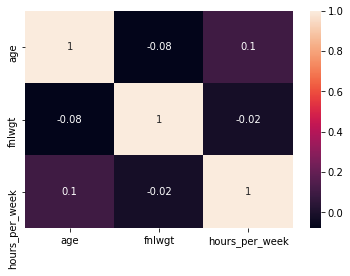

In [15]:
sns.heatmap(salary_data[['age', 'fnlwgt', 'hours_per_week']].corr().round(2),annot=True)

plt.show()

## Problem 7. Calculate the following measures: average age, median age, min age, max age, st. dev of age. (0.5 points)

In [16]:
print("Average age is: ",round(salary_data.age.mean(),1))
print("Median age is: ",round(salary_data.age.median(),1))
print("Minimum age is: ",round(salary_data.age.min(),1))
print("Maximum age is: ",round(salary_data.age.max(),1))
print("Standard deviation of age is: ",round(salary_data.age.std(),1))

Average age is:  38.5
Median age is:  37.0
Minimum age is:  17
Maximum age is:  90
Standard deviation of age is:  13.5


## Problem 8.  Visualize relationships below by using either matplotlib.pyplot OR seaborn modules. This script here might be helpful if you are not sure what types of charts to choose. You are free to use other types of charts as well. You should use at least two different types of charts. (2points)


> **a. Relationship between “Income” and “Age”,**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



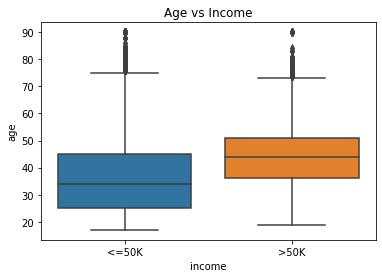

In [17]:
sns.boxplot(salary_data.income, 
           salary_data.age,
           orient='v').set(title='Age vs Income')

plt.show()

> **Relationship between “Income” and “Gender”**

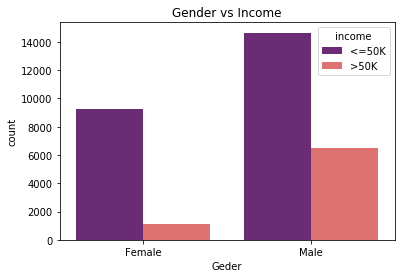

In [18]:
sns.countplot(x = 'Geder', hue = 'income', data = salary_data, palette = 'magma')
plt.title('Gender vs Income')
plt.show()

> **c. Relationship between “Income” and “Race”**

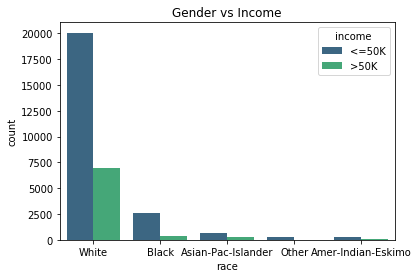

In [19]:
sns.countplot(x = 'race', hue = 'income', data = salary_data, palette = 'viridis')
plt.title('Gender vs Income')
plt.show()

> **d. Relationship between “Age” and “hours per week”**

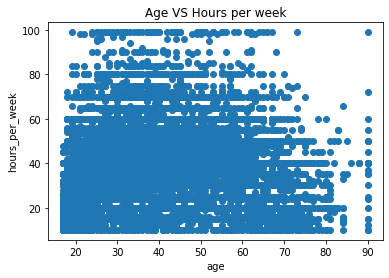

In [20]:
plt.scatter(salary_data.age, 
            salary_data.hours_per_week 
           )
plt.xlabel('age')
plt.ylabel('hours_per_week')
plt.title("Age VS Hours per week") 
plt.show()

> **d. Relationship between “hours per week” and “Income”**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



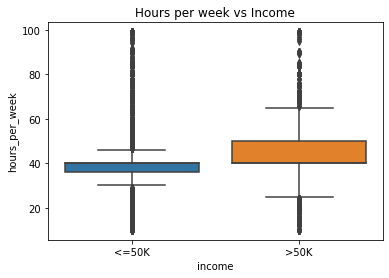

In [21]:
sns.boxplot(salary_data.income, 
           salary_data.hours_per_week,
           orient='v').set(title='Hours per week vs Income')

plt.show()

## Problem 9. Use for loop to visualize distribution of all numeric variables in the dataset. (1 point)


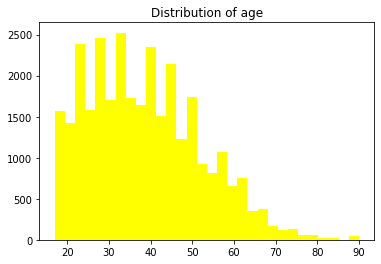

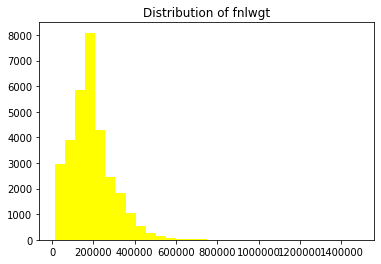

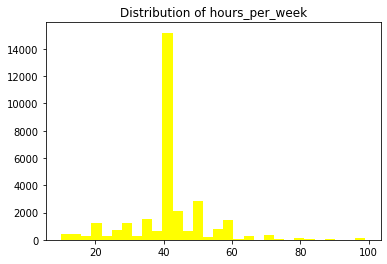

In [22]:
data_numeric = salary_data.select_dtypes(exclude='object')

for i in data_numeric.columns:
    plt.hist(data_numeric[i],
         color='yellow',
         bins=30
        )
    plt.title(f"Distribution of {i}")
    plt.show()

## Problem 10. Make a general conclusion about your findings. Basically, you need to  answer the following question based on the charts and descriptive measures that you’ve  calculated: What are the main characteristics of higher income earners? (0.5 points)

> ### According to the findings, the median age of those whose income is more than 50k is higher compared to those whose income is less than or equall to 50k. Additionally, the number of males whose income is more than 50k is higher compared to the males with income less than or equal to 50k. The same pattern exists for females. Moreover, people who spend more than 40 hours per week have income more than 50.

## Problem  11.  Download from Yahoo Finance the data for the five stocks that you wish to  invest in for [2008-01-01, 2021-01-01] period. From pandas_datareader.data use  DataReader() function. (1 point)

In [23]:
tickers = ["DIS","TSLA","AMZN","AAPL","MSFT"]

In [24]:
data_stocks=data.DataReader(name=tickers,
                           data_source='yahoo',
                           start='2008-01-01',
                           end='2021-01-01',
                           pause=0.1
                           )
data_stocks.head(2)

Attributes  Adj Close                                       Close       \
Symbols           DIS TSLA       AMZN      AAPL       MSFT    DIS TSLA   
Date                                                                     
2008-01-02  27.012505  NaN  96.250000  5.983694  26.195889  31.84  NaN   
2008-01-03  26.953121  NaN  95.209999  5.986459  26.307467  31.77  NaN   

Attributes                                  ...       Open                  \
Symbols          AMZN      AAPL       MSFT  ...        DIS TSLA       AMZN   
Date                                        ...                              
2008-01-02  96.250000  6.958571  35.220001  ...  32.320000  NaN  95.349998   
2008-01-03  95.209999  6.961786  35.369999  ...  31.879999  NaN  96.059998   

Attributes                          Volume                                 \
Symbols         AAPL       MSFT        DIS TSLA        AMZN          AAPL   
Date                                                                        
2008-01-02  7.116786  35.790001  9269900.0  NaN  13858700.0  1.079179e+09   
2008-01-03  6.978929  35.220001  9681100.0  NaN   9122500.0  8.420664e+08   

Attributes              
Symbols           MSFT  
Date                    
2008-01-02  63004200.0  
2008-01-03  49599600.0  

[2 rows x 30 columns]

## Problem 12. Use plotly.offline to create an interactive chart that will show how the Open prices of the stocks (imported above) have changed over time. Only one chart should be created. (1 point)


In [25]:
#Change column names so that we have only one raw for column headings
data_stocks.columns=data_stocks.columns.map('_'.join)

In [26]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Open_DIS,
                        mode='lines',
                        name='Open Price of DISL'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Open_TSLA,
                        mode='lines',
                        name='Open Price of TSLA'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Open_AMZN,
                        mode='lines',
                        name='Open Price of AMZN'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Open_AAPL,
                        mode='lines',
                        name='Open Price of AAPL'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Open_MSFT,
                        mode='lines',
                        name='Open Price of MSFT'))

fig.update_layout(title='Comparison of Open Prices Among The Stocks')

fig.show()

# (1 points) Premium question. By using for loop create an interactive histogram for ‘age’, ‘hours per week’ and ‘fnlwgt’ variables. What is your conclusion about distribution of those variables?

In [27]:
for i in ['age', 'hours_per_week','fnlwgt']:
    fig=go.Figure(data=[go.Histogram(x=salary_data[i])])
    fig.update_layout(title=f'Distribution of {i}')
    fig.show()